In [11]:
%%time
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings

warnings.filterwarnings('ignore')

# 加载数据
r = pd.read_csv('E:/6个数据集数据汇总/weibo_rumor_all.csv')
t = pd.read_csv('E:/6个数据集数据汇总/weibo_true_all.csv')
r['label'] = 1
t['label'] = 0
df = pd.concat([t, r], ignore_index=True)

# 特征归一化
df1 = df.iloc[:, 2:-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df7 = df1[['m3_1', 'm3_2', 'm4_1', 'm4_2', 
           'm4_3', 'm4_4', 'm5_1', 'm5_2', 
           'm5_3', 'm5_4', 'm5_5', 'm5_6', 
           'm5_7', 'm5_8', 'm5_9']]
label = df['label']

# 初始化结果列表
results = []

# 多轮实验
for iteration in range(50):
    print(f'---------- Iteration {iteration+1} ----------')
    
    # 划分训练与测试集
    train_x, test_x, train_y, test_y = train_test_split(df7, label, test_size=0.2, stratify=label, random_state=iteration)

    # 不做过采样，直接用原始训练集计算 scale_pos_weight
    scale_weight = train_y.value_counts()[0] / train_y.value_counts()[1]

    # 超参数网格
    param_grid = {
        'n_estimators': [100, 150],
        'max_depth': [5, 10],
        'min_child_weight': [2, 4],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0],
        'reg_lambda': [0.1, 1.0]
    }

    xgb_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_weight
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=iteration)

    grid = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    grid.fit(train_x, train_y)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(test_x)

    results.append({
        'Iteration': iteration + 1,
        'Accuracy': round(accuracy_score(test_y, y_pred), 3),
        'Recall': round(recall_score(test_y, y_pred), 3),
        'F1 Score': round(f1_score(test_y, y_pred), 3),
        'Precision': round(precision_score(test_y, y_pred), 3),
        'Best Params': grid.best_params_
    })

# 保存结果
results_df = pd.DataFrame(results)
results_df.to_csv('MMTD_results_weighted_no_oversample_5fold.csv', index=False)


---------- Iteration 1 ----------
---------- Iteration 2 ----------
---------- Iteration 3 ----------
---------- Iteration 4 ----------
---------- Iteration 5 ----------
---------- Iteration 6 ----------
---------- Iteration 7 ----------
---------- Iteration 8 ----------
---------- Iteration 9 ----------
---------- Iteration 10 ----------
---------- Iteration 11 ----------
---------- Iteration 12 ----------
---------- Iteration 13 ----------
---------- Iteration 14 ----------
---------- Iteration 15 ----------
---------- Iteration 16 ----------
---------- Iteration 17 ----------
---------- Iteration 18 ----------
---------- Iteration 19 ----------
---------- Iteration 20 ----------
---------- Iteration 21 ----------
---------- Iteration 22 ----------
---------- Iteration 23 ----------
---------- Iteration 24 ----------
---------- Iteration 25 ----------
---------- Iteration 26 ----------
---------- Iteration 27 ----------
---------- Iteration 28 ----------
---------- Iteration 29 -----

In [13]:
%%time
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings

warnings.filterwarnings('ignore')

# 加载数据
r = pd.read_csv('E:/6个数据集数据汇总/weibo_rumor_all.csv')
t = pd.read_csv('E:/6个数据集数据汇总/weibo_true_all.csv')
r['label'] = 1
t['label'] = 0
df = pd.concat([t, r], ignore_index=True)

# 特征归一化
df1 = df.iloc[:, 2:-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df7 = df1[[ 'm4_1', 'm4_2', 
           'm4_3', 'm4_4', 'm5_1', 'm5_2', 
           'm5_3', 'm5_4', 'm5_5', 'm5_6', 
           'm5_7', 'm5_8', 'm5_9']]
label = df['label']

# 初始化结果列表
results = []

# 多轮实验
for iteration in range(20):
    print(f'---------- Iteration {iteration+1} ----------')
    
    # 划分训练与测试集
    train_x, test_x, train_y, test_y = train_test_split(df7, label, test_size=0.2, stratify=label, random_state=iteration)

    # 不做过采样，直接用原始训练集计算 scale_pos_weight
    scale_weight = train_y.value_counts()[0] / train_y.value_counts()[1]

    # 超参数网格
    param_grid = {
        'n_estimators': [100, 150],
        'max_depth': [5, 10],
        'min_child_weight': [2, 4],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0],
        'reg_lambda': [0.1, 1.0]
    }

    xgb_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_weight
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=iteration)

    grid = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    grid.fit(train_x, train_y)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(test_x)

    results.append({
        'Iteration': iteration + 1,
        'Accuracy': round(accuracy_score(test_y, y_pred), 3),
        'Recall': round(recall_score(test_y, y_pred), 3),
        'F1 Score': round(f1_score(test_y, y_pred), 3),
        'Precision': round(precision_score(test_y, y_pred), 3),
        'Best Params': grid.best_params_
    })

# 保存结果
results_df = pd.DataFrame(results)
results_df.to_csv('MMTD_消融去3阶_weighted_no_oversample_5fold.csv', index=False)


---------- Iteration 1 ----------
---------- Iteration 2 ----------
---------- Iteration 3 ----------
---------- Iteration 4 ----------
---------- Iteration 5 ----------
---------- Iteration 6 ----------
---------- Iteration 7 ----------
---------- Iteration 8 ----------
---------- Iteration 9 ----------
---------- Iteration 10 ----------
---------- Iteration 11 ----------
---------- Iteration 12 ----------
---------- Iteration 13 ----------
---------- Iteration 14 ----------
---------- Iteration 15 ----------
---------- Iteration 16 ----------
---------- Iteration 17 ----------
---------- Iteration 18 ----------
---------- Iteration 19 ----------
---------- Iteration 20 ----------
CPU times: total: 4min 32s
Wall time: 3min 39s


In [19]:
%%time
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings

warnings.filterwarnings('ignore')

# 加载数据
r = pd.read_csv('E:/6个数据集数据汇总/weibo_rumor_all.csv')
t = pd.read_csv('E:/6个数据集数据汇总/weibo_true_all.csv')
r['label'] = 1
t['label'] = 0
df = pd.concat([t, r], ignore_index=True)

# 特征归一化
df1 = df.iloc[:, 2:-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df7 = df1[['m3_1', 'm3_2',  'm5_1', 'm5_2', 
           'm5_3', 'm5_4', 'm5_5', 'm5_6', 
           'm5_7', 'm5_8', 'm5_9']]
label = df['label']

# 初始化结果列表
results = []

# 多轮实验
for iteration in range(20):
    print(f'---------- Iteration {iteration+1} ----------')
    
    # 划分训练与测试集
    train_x, test_x, train_y, test_y = train_test_split(df7, label, test_size=0.2, stratify=label, random_state=iteration)

    # 不做过采样，直接用原始训练集计算 scale_pos_weight
    scale_weight = train_y.value_counts()[0] / train_y.value_counts()[1]

    # 超参数网格
    param_grid = {
        'n_estimators': [100, 150],
        'max_depth': [5, 10],
        'min_child_weight': [2, 4],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0],
        'reg_lambda': [0.1, 1.0]
    }

    xgb_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_weight
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=iteration)

    grid = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    grid.fit(train_x, train_y)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(test_x)

    results.append({
        'Iteration': iteration + 1,
        'Accuracy': round(accuracy_score(test_y, y_pred), 3),
        'Recall': round(recall_score(test_y, y_pred), 3),
        'F1 Score': round(f1_score(test_y, y_pred), 3),
        'Precision': round(precision_score(test_y, y_pred), 3),
        'Best Params': grid.best_params_
    })

# 保存结果
results_df = pd.DataFrame(results)
results_df.to_csv('MMTD_消融去4阶_weighted_no_oversample_5fold.csv', index=False)


---------- Iteration 1 ----------
---------- Iteration 2 ----------
---------- Iteration 3 ----------
---------- Iteration 4 ----------
---------- Iteration 5 ----------
---------- Iteration 6 ----------
---------- Iteration 7 ----------
---------- Iteration 8 ----------
---------- Iteration 9 ----------
---------- Iteration 10 ----------
---------- Iteration 11 ----------
---------- Iteration 12 ----------
---------- Iteration 13 ----------
---------- Iteration 14 ----------
---------- Iteration 15 ----------
---------- Iteration 16 ----------
---------- Iteration 17 ----------
---------- Iteration 18 ----------
---------- Iteration 19 ----------
---------- Iteration 20 ----------
CPU times: total: 22min
Wall time: 7min 16s


In [22]:
%%time
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings

warnings.filterwarnings('ignore')

# 加载数据
r = pd.read_csv('E:/6个数据集数据汇总/weibo_rumor_all.csv')
t = pd.read_csv('E:/6个数据集数据汇总/weibo_true_all.csv')
r['label'] = 1
t['label'] = 0
df = pd.concat([t, r], ignore_index=True)

# 特征归一化
df1 = df.iloc[:, 2:-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df7 = df1[['m3_1', 'm3_2', 'm4_1', 'm4_2', 
           'm4_3', 'm4_4']]
label = df['label']

# 初始化结果列表
results = []

# 多轮实验
for iteration in range(20):
    print(f'---------- Iteration {iteration+1} ----------')
    
    # 划分训练与测试集
    train_x, test_x, train_y, test_y = train_test_split(df7, label, test_size=0.2, stratify=label, random_state=iteration)

    # 不做过采样，直接用原始训练集计算 scale_pos_weight
    scale_weight = train_y.value_counts()[0] / train_y.value_counts()[1]

    # 超参数网格
    param_grid = {
        'n_estimators': [100, 150],
        'max_depth': [5, 10],
        'min_child_weight': [2, 4],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0],
        'reg_lambda': [0.1, 1.0]
    }

    xgb_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_weight
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=iteration)

    grid = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    grid.fit(train_x, train_y)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(test_x)

    results.append({
        'Iteration': iteration + 1,
        'Accuracy': round(accuracy_score(test_y, y_pred), 3),
        'Recall': round(recall_score(test_y, y_pred), 3),
        'F1 Score': round(f1_score(test_y, y_pred), 3),
        'Precision': round(precision_score(test_y, y_pred), 3),
        'Best Params': grid.best_params_
    })

# 保存结果
results_df = pd.DataFrame(results)
results_df.to_csv('MMTD_消融去5阶_weighted_no_oversample_5fold.csv', index=False)


---------- Iteration 1 ----------
---------- Iteration 2 ----------
---------- Iteration 3 ----------
---------- Iteration 4 ----------
---------- Iteration 5 ----------
---------- Iteration 6 ----------
---------- Iteration 7 ----------
---------- Iteration 8 ----------
---------- Iteration 9 ----------
---------- Iteration 10 ----------
---------- Iteration 11 ----------
---------- Iteration 12 ----------
---------- Iteration 13 ----------
---------- Iteration 14 ----------
---------- Iteration 15 ----------
---------- Iteration 16 ----------
---------- Iteration 17 ----------
---------- Iteration 18 ----------
---------- Iteration 19 ----------
---------- Iteration 20 ----------
CPU times: total: 4min 16s
Wall time: 2min 13s


In [25]:
%%time
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
import warnings

warnings.filterwarnings('ignore')

# 加载数据
r = pd.read_csv('E:/6个数据集数据汇总/gossipcop_fake.csv')
t = pd.read_csv('E:/6个数据集数据汇总/gossipcop_real.csv')
r['label'] = 1
t['label'] = 0
df = pd.concat([t, r], ignore_index=True)

# 特征归一化
df1 = df.iloc[:, 2:-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df7 = df1[['m3_1', 'm3_2', 'm4_1', 'm4_2', 
           'm4_3', 'm4_4']]
label = df['label']

# 初始化结果列表
results = []

# 多轮实验
for iteration in range(20):
    print(f'---------- Iteration {iteration+1} ----------')

    # 划分训练与测试集
    train_x, test_x, train_y, test_y = train_test_split(df7, label, test_size=0.2, stratify=label, random_state=iteration)

    # 轻度过采样：让少数类达到多数类的80%
    ros = RandomOverSampler(sampling_strategy=0.75, random_state=iteration)
    train_x_res, train_y_res = ros.fit_resample(train_x, train_y)

    # 根据过采样后的训练集重新计算 scale_pos_weight
    scale_weight = train_y_res.value_counts()[0] / train_y_res.value_counts()[1]

    # 超参数网格
    param_grid = {
        'n_estimators': [100, 150],
        'max_depth': [5, 10],
        'min_child_weight': [2, 4],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0],
        'reg_lambda': [0.1, 1.0]
    }

    xgb_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_weight
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=iteration)

    grid = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    grid.fit(train_x_res, train_y_res)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(test_x)

    results.append({
        'Iteration': iteration + 1,
        'Accuracy': round(accuracy_score(test_y, y_pred), 3),
        'Recall': round(recall_score(test_y, y_pred), 3),
        'F1 Score': round(f1_score(test_y, y_pred), 3),
        'Precision': round(precision_score(test_y, y_pred), 3),
        'Best Params': grid.best_params_
    })

# 保存结果
results_df = pd.DataFrame(results)
results_df.to_csv('MMTD_gossipcop_去5阶_oversample_5fold.csv', index=False)


---------- Iteration 1 ----------
---------- Iteration 2 ----------
---------- Iteration 3 ----------
---------- Iteration 4 ----------
---------- Iteration 5 ----------
---------- Iteration 6 ----------
---------- Iteration 7 ----------
---------- Iteration 8 ----------
---------- Iteration 9 ----------
---------- Iteration 10 ----------
---------- Iteration 11 ----------
---------- Iteration 12 ----------
---------- Iteration 13 ----------
---------- Iteration 14 ----------
---------- Iteration 15 ----------
---------- Iteration 16 ----------
---------- Iteration 17 ----------
---------- Iteration 18 ----------
---------- Iteration 19 ----------
---------- Iteration 20 ----------
CPU times: total: 11min 32s
Wall time: 4min 21s


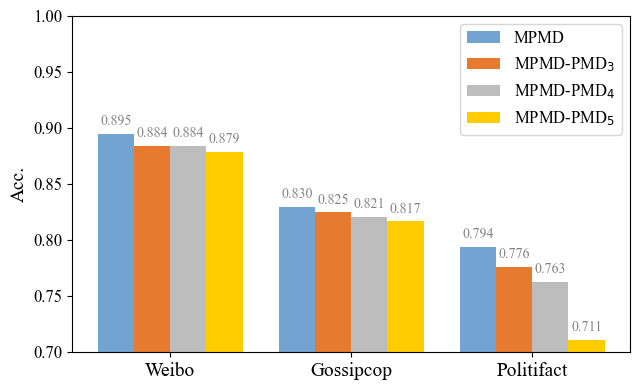

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
# 读取 CSV 文件
df = pd.read_csv(r'C:\Users\Administrator\Desktop\小论文-修改意见\消融.csv')
df.set_index('type', inplace=True)

# 样式配置
bar_width = 0.2
x = range(len(df.index))
colors = ['#73A4D1', '#E67B30', '#BDBDBD', '#FFCC00']  # 精确匹配原图颜色
labels = ['MPMD', 'MPMD-PMD$_3$', 'MPMD-PMD$_4$', 'MPMD-PMD$_5$']

# 绘图
fig, ax = plt.subplots(figsize=(6.5,4))

for i, col in enumerate(df.columns):
    ax.bar(
        [p + i * bar_width for p in x],
        df[col],
        width=bar_width,
        color=colors[i],
        label=labels[i]
    )
    for j, val in enumerate(df[col]):
        ax.text(j + i * bar_width, val + 0.005, f'{val:.3f}', 
        ha='center', va='bottom', fontsize=10, color='gray')


# 坐标轴设置
ax.set_xticks([p + 1.5 * bar_width for p in x])
ax.set_xticklabels(df.index, fontsize=14)
ax.set_ylabel('Acc.', fontsize=14)
ax.set_ylim(0.7, 1.0)

# 图例样式
ax.legend(title='', fontsize=12, loc='upper right', ncol=1, )

# 去除边框
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
plt.yticks(fontsize=12)  # 将 y 轴刻度字体大小设置为 12

plt.tight_layout()
plt.savefig('Fig. 7.  Results of the ablation study conducted on the three datasets.pdf', dpi=600, bbox_inches='tight')

plt.show()


In [1]:
%%time
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings

# 忽略警告
warnings.filterwarnings('ignore')

# 加载数据
r = pd.read_csv('F:/6个数据集数据汇总/weibo_rumor_all.csv')
t = pd.read_csv('F:/6个数据集数据汇总/weibo_true_all.csv')
r['label'] = 1
t['label'] = 0
t1 = t.sample(2129) 
df = t1.append(r, ignore_index=True)
df1 = df.iloc[:, 2:-1].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))  # 归一化

df7 = df1[['m3_1', 'm3_2', 'm4_1', 'm4_2', 
           'm4_3', 'm4_4', 'm5_1', 'm5_2', 
           'm5_3', 'm5_4', 'm5_5', 'm5_6', 
           'm5_7', 'm5_8', 'm5_9']] # 融合高阶

# 初始化保存结果的列表
results = []

# 检测准确性
for iteration in range(20):
    print(f'---------- Iteration {iteration+1} ----------')
    label = df['label'] 
    train_x, test_x, train_y, test_y = train_test_split(df7, label, test_size=0.2)
    
    # 添加学习率、最大深度、子采样率和 L2 正则化系数的参数网格
    param_grid = {
        'n_estimators': [50, 100, 150, 200, 300],
        'max_depth': [5, 10, 20],
        'min_child_weight': [2, 3, 4],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'reg_lambda': [0.01, 0.1, 1.0]
    }
    
    grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, refit=True, verbose=0)
    grid.fit(train_x, train_y)
    
    # 输出最优参数和最优得分
    print('Best parameters:', grid.best_params_)
    print('Best score:', grid.best_score_)
    
    model = grid.best_estimator_
    y_pred = model.predict(test_x)
    
    ACC = float('%.3f' % accuracy_score(test_y, y_pred))
    Recall = float('%.3f' % recall_score(test_y, y_pred))
    F1 = float('%.3f' % f1_score(test_y, y_pred))
    Precesion = float('%.3f' % precision_score(test_y, y_pred))
    
    results.append({
        'Iteration': iteration + 1,
        'Accuracy': ACC,
        'Recall': Recall,
        'F1 Score': F1,
        'Precision': Precesion,
        'Best Params': grid.best_params_  # 记录最优参数
    })

# 将结果写入CSV文件
results_df = pd.DataFrame(results)
results_df.to_csv('MMTD_results_1.csv', index=False)


---------- Iteration 1 ----------
Best parameters: {'learning_rate': 0.1, 'max_depth': 20, 'min_child_weight': 3, 'n_estimators': 100, 'reg_lambda': 0.01, 'subsample': 0.6}
Best score: 0.8680007406737549
---------- Iteration 2 ----------
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 150, 'reg_lambda': 0.01, 'subsample': 0.6}
Best score: 0.8770877741461798
---------- Iteration 3 ----------
Best parameters: {'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 300, 'reg_lambda': 1.0, 'subsample': 0.6}
Best score: 0.8735678513140499
---------- Iteration 4 ----------
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 50, 'reg_lambda': 1.0, 'subsample': 0.6}
Best score: 0.8721106187640222
---------- Iteration 5 ----------
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 50, 'reg_lambda': 1.0, 'subsample': 0.6}
Best score: 0.8

In [21]:
%%time
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
import warnings

warnings.filterwarnings('ignore')

# 加载数据
r = pd.read_csv('E:/6个数据集数据汇总/gossipcop_fake.csv')
t = pd.read_csv('E:/6个数据集数据汇总/gossipcop_real.csv')
r['label'] = 1
t['label'] = 0
df = pd.concat([t, r], ignore_index=True)

# 特征归一化
df1 = df.iloc[:, 2:-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df7 = df1[['m4_1', 'm4_2', 
           'm4_3', 'm4_4', 'm5_1', 'm5_2', 
           'm5_3', 'm5_4', 'm5_5', 'm5_6', 
           'm5_7', 'm5_8', 'm5_9']]
label = df['label']

# 初始化结果列表
results = []

# 多轮实验
for iteration in range(20):
    print(f'---------- Iteration {iteration+1} ----------')

    # 划分训练与测试集
    train_x, test_x, train_y, test_y = train_test_split(df7, label, test_size=0.2, stratify=label, random_state=iteration)

    # 轻度过采样：让少数类达到多数类的80%
    ros = RandomOverSampler(sampling_strategy=0.8, random_state=iteration)
    train_x_res, train_y_res = ros.fit_resample(train_x, train_y)

    # 根据过采样后的训练集重新计算 scale_pos_weight
    scale_weight = train_y_res.value_counts()[0] / train_y_res.value_counts()[1]

    # 超参数网格
    param_grid = {
        'n_estimators': [100, 150],
        'max_depth': [5, 10],
        'min_child_weight': [2, 4],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0],
        'reg_lambda': [0.1, 1.0]
    }

    xgb_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_weight
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=iteration)

    grid = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    grid.fit(train_x_res, train_y_res)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(test_x)

    results.append({
        'Iteration': iteration + 1,
        'Accuracy': round(accuracy_score(test_y, y_pred), 3),
        'Recall': round(recall_score(test_y, y_pred), 3),
        'F1 Score': round(f1_score(test_y, y_pred), 3),
        'Precision': round(precision_score(test_y, y_pred), 3),
        'Best Params': grid.best_params_
    })

# 保存结果
results_df = pd.DataFrame(results)
results_df.to_csv('MMTD_gossipcop_去3阶_oversample_5fold.csv', index=False)


---------- Iteration 1 ----------
---------- Iteration 2 ----------
---------- Iteration 3 ----------
---------- Iteration 4 ----------
---------- Iteration 5 ----------
---------- Iteration 6 ----------
---------- Iteration 7 ----------
---------- Iteration 8 ----------
---------- Iteration 9 ----------
---------- Iteration 10 ----------
---------- Iteration 11 ----------
---------- Iteration 12 ----------
---------- Iteration 13 ----------
---------- Iteration 14 ----------
---------- Iteration 15 ----------
---------- Iteration 16 ----------
---------- Iteration 17 ----------
---------- Iteration 18 ----------
---------- Iteration 19 ----------
---------- Iteration 20 ----------
CPU times: total: 26min 16s
Wall time: 9min 43s


In [ ]:
## 消融实验
%%time
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings

# 忽略警告
warnings.filterwarnings('ignore')

# 加载数据
r = pd.read_csv('F:/6个数据集数据汇总/weibo_rumor_all.csv')
t = pd.read_csv('F:/6个数据集数据汇总/weibo_true_all.csv')
r['label'] = 1
t['label'] = 0
t1 = t.sample(2129) 
df = t1.append(r, ignore_index=True)
df1 = df.iloc[:, 2:-1].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))  # 归一化

df7 = df1[[ 'm4_1', 'm4_2', 
           'm4_3', 'm4_4', 'm5_1', 'm5_2', 
           'm5_3', 'm5_4', 'm5_5', 'm5_6', 
           'm5_7', 'm5_8', 'm5_9']] # 融合高阶

# 初始化保存结果的列表
results = []

# 检测准确性
for iteration in range(20):
    print(f'---------- Iteration {iteration+1} ----------')
    label = df['label'] 
    train_x, test_x, train_y, test_y = train_test_split(df7, label, test_size=0.2)
    
    # 添加学习率、最大深度、子采样率和 L2 正则化系数的参数网格
    param_grid = {
        'n_estimators': [50, 100, 150, 200, 300],
        'max_depth': [5, 10, 20],
        'min_child_weight': [2, 3, 4],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'reg_lambda': [0.01, 0.1, 1.0]
    }
    
    grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, refit=True, verbose=0)
    grid.fit(train_x, train_y)
    
    # 输出最优参数和最优得分
    print('Best parameters:', grid.best_params_)
    print('Best score:', grid.best_score_)
    
    model = grid.best_estimator_
    y_pred = model.predict(test_x)
    
    ACC = float('%.3f' % accuracy_score(test_y, y_pred))
    Recall = float('%.3f' % recall_score(test_y, y_pred))
    F1 = float('%.3f' % f1_score(test_y, y_pred))
    Precesion = float('%.3f' % precision_score(test_y, y_pred))
    
    results.append({
        'Iteration': iteration + 1,
        'Accuracy': ACC,
        'Recall': Recall,
        'F1 Score': F1,
        'Precision': Precesion,
        'Best Params': grid.best_params_  # 记录最优参数
    })

# 将结果写入CSV文件
results_df = pd.DataFrame(results)
results_df.to_csv('MMTD_results_1.csv', index=False)


In [ ]:
# 读取CSV文件
r = pd.read_csv('F:/6个数据集数据汇总/politifact_fake.csv')
t = pd.read_csv('F:/6个数据集数据汇总/politifact_real.csv')

# 为两个数据框添加标签
r['label'] = 1
t['label'] = 0

# 截取r的前220行
r_subset = r.iloc[:220, :]

# 合并两个DataFrame
df = pd.concat([t, r_subset], ignore_index=True)

df1 = df.iloc[:, 2:-1].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))  # 归一化

df7 = df1[['m3_1', 'm3_2', 'm4_1', 'm4_2', 
           'm4_3', 'm4_4', 'm5_1', 'm5_2', 
           'm5_3', 'm5_4', 'm5_5', 'm5_6', 
           'm5_7', 'm5_8', 'm5_9']] # 融合高阶

# 初始化保存结果的列表
results = []

# 检测准确性
for iteration in range(10):
    print(f'---------- Iteration {iteration+1} ----------')
    label = df['label'] 
    train_x, test_x, train_y, test_y = train_test_split(df7, label, test_size=0.2, random_state=iteration)
    
    # 调整参数网格的范围，减少搜索时间
    param_grid = {
        'n_estimators': [50, 100, 150],  # 限制较小范围
        'max_depth': [5, 10],  # 减少深度选择
        'min_child_weight': [2, 3],
        'learning_rate': [0.01, 0.1],  # 减少学习率候选值
        'subsample': [0.8],  # 固定较为常用的子采样率
        'reg_lambda': [0.1, 1.0]  # 减少正则化参数
    }
    
    # 使用并行计算加速搜索过程
    grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                        param_grid, refit=True, verbose=0, cv=3, n_jobs=-1)
    grid.fit(train_x, train_y)
    
    # 输出最优参数和最优得分
    print('Best parameters:', grid.best_params_)
    print('Best score:', grid.best_score_)
    
    model = grid.best_estimator_
    y_pred = model.predict(test_x)
    
    # 计算各项指标
    ACC = float('%.3f' % accuracy_score(test_y, y_pred))
    Recall = float('%.3f' % recall_score(test_y, y_pred))
    F1 = float('%.3f' % f1_score(test_y, y_pred))
    Precision = float('%.3f' % precision_score(test_y, y_pred))
    
    # 保存结果
    results.append({
        'Iteration': iteration + 1,
        'Accuracy': ACC,
        'Recall': Recall,
        'F1 Score': F1,
        'Precision': Precision,
        'Best Params': grid.best_params_  # 记录最优参数
    })

# 将结果写入CSV文件
results_df = pd.DataFrame(results)
results_df.to_csv('MMTD_results_politifact.csv', index=False)

print("所有轮次的分类结果已保存至 'MMTD_results_politifact.csv'.")

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# 读取CSV文件
r = pd.read_csv('F:/6个数据集数据汇总/politifact_fake.csv')
t = pd.read_csv('F:/6个数据集数据汇总/politifact_real.csv')

# 为两个数据框添加标签
r['label'] = 1
t['label'] = 0

# 截取r的前220行
r_subset = r.iloc[:220, :]

# 合并两个DataFrame
df = pd.concat([t, r_subset], ignore_index=True)

# 归一化处理
df1 = df.iloc[:, 2:-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# 选择特定的融合高阶特征列
df7 = df1[['m3_1', 'm3_2', 'm4_1', 'm4_2', 
           'm4_3', 'm4_4', 'm5_1', 'm5_2', 
           'm5_3', 'm5_4', 'm5_5', 'm5_6', 
           'm5_7', 'm5_8', 'm5_9']]

# 初始化保存结果的列表
results = []

# 检测准确性
for iteration in range(10):
    try:
        print(f'---------- Iteration {iteration+1} ----------')
        label = df['label']
        
        # 进行数据集的划分
        train_x, test_x, train_y, test_y = train_test_split(df7, label, test_size=0.2, random_state=iteration)
        
        # 调整参数网格的范围，减少搜索时间
        param_grid = {
            'n_estimators': [50, 100],  # 调小参数范围以减少时间
            'max_depth': [5, 10],
            'min_child_weight': [2],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8],
            'reg_lambda': [0.1, 1.0]
        }
        
        # 使用并行计算加速搜索过程，verbose设为2以查看进程
        grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                            param_grid, refit=True, verbose=2, cv=3, n_jobs=-1)
        
        # 模型训练
        grid.fit(train_x, train_y)
        
        # 输出最优参数和最优得分
        print('Best parameters:', grid.best_params_)
        print('Best score:', grid.best_score_)
        
        # 使用最优模型进行预测
        model = grid.best_estimator_
        y_pred = model.predict(test_x)
        
        # 计算各项指标
        ACC = float('%.3f' % accuracy_score(test_y, y_pred))
        Recall = float('%.3f' % recall_score(test_y, y_pred))
        F1 = float('%.3f' % f1_score(test_y, y_pred))
        Precision = float('%.3f' % precision_score(test_y, y_pred))
        
        # 保存结果
        results.append({
            'Iteration': iteration + 1,
            'Accuracy': ACC,
            'Recall': Recall,
            'F1 Score': F1,
            'Precision': Precision,
            'Best Params': grid.best_params_
        })
    
    except Exception as e:
        print(f"Iteration {iteration+1} encountered an error: {str(e)}")

# 将结果写入CSV文件
results_df = pd.DataFrame(results)
results_df.to_csv('MMTD_results_politifact.csv', index=False)

print("所有轮次的分类结果已保存至 'MMTD_results_politifact.csv'.")
